In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array

Using TensorFlow backend.


In [39]:
model = Sequential()
model.add(LSTM(1, return_sequences=False, input_shape=(3,1)))
model.compile(optimizer='adam',loss='mse')

In [40]:
data = array([0.1,0.2,0.3]).reshape((1,3,1))

In [41]:
model.predict(data)

array([[0.12149701]], dtype=float32)

In [42]:
model.predict(data).shape

(1, 1)

In [43]:
from math import sin
from math import pi
from matplotlib import pyplot

In [44]:
length=100
freq=5
sequence=[sin(2*pi*freq*(i/length)) for i in range(length)]

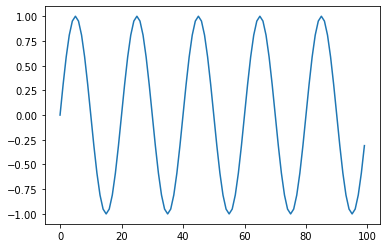

In [45]:
pyplot.plot(sequence)

In [46]:
from math import exp

In [47]:
length=100
period=10
decay=0.05
sequence = [0.5 + 0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

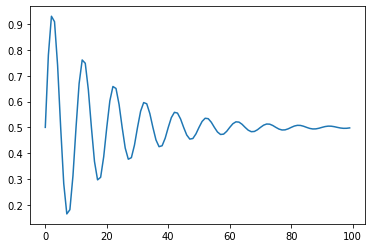

In [48]:
pyplot.plot(sequence)

In [53]:
def generate_sequence(length, period, decay):
    return [0.5 + 0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

In [54]:
def generate_examples(length, n_patterns, output):
    X,y = list(), list()
    for _ in range(n_patterns):
        p = randint(10,20)
        d = uniform(0.01,0.1)
        sequence = generate_sequence(length+output,p,d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns,output)
    return X,y

In [52]:
from random import random
from random import randint
from random import uniform
from numpy import array

In [55]:
X,y = generate_examples(20,5,5)

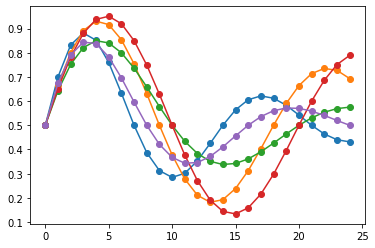

In [56]:
for i in range(len(X)):
    pyplot.plot([x for x in X[i,:,0]] + [x for x in y[i]],'-o')

In [58]:
from keras.layers import Dense
length = 50
output=5
model=Sequential()
model.add(LSTM(20,return_sequences=True, input_shape=(length,1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss='mae',optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_16 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
X,y = generate_examples(length, 10000, output)
model.fit(X,y, batch_size=10, epochs=1)

Epoch 1/1
10000/10000 [==============================] - 38s 4ms/step - loss: 0.0404


In [64]:
X,y = generate_examples(length, 1000, output)
loss = model.evaluate(X,y, verbose=0)
print('MAE: %f' %loss)

MAE: 0.026496


In [71]:
X,y = generate_examples(length, 1, output)
yhat=model.predict(X,verbose=0)

In [72]:
y[0]

array([0.40706255, 0.38745816, 0.38085104, 0.38724667, 0.40526986])

In [73]:
yhat[0]

array([0.37210327, 0.34096956, 0.3560828 , 0.3742673 , 0.39896393],
      dtype=float32)

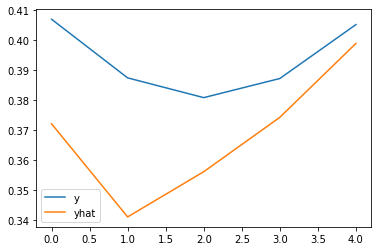

In [74]:
pyplot.plot(y[0],label='y')
pyplot.plot(yhat[0],label='yhat')
pyplot.legend()